In [36]:
#You are working to minimize the transportation costs of shipping products from warehouses in New York, and Atlanta, to customers in the East, South, Midwest, and West regions of the US. 
#The input data of transportation costs and demand for each region is given to you in the variable d which is printed in the console.

from pulp import LpProblem, LpVariable, lpSum, LpStatus, value, LpMinimize, 
import random
import pandas as pd

Cost_demand2=pd.DataFrame()

Cost_demand2['New York'] = [211,232,240,300]
Cost_demand2['Atlanta'] = [232,212,230,280]
Cost_demand2['demand'] = [1800,1200,1100,1000]
Cost_demand2['Cust'] = ['East','South','Midwest', 'West']

Cost_demand2 = Cost_demand2.set_index(['Cust'])

d = Cost_demand2


cust = ['East','South','Midwest', 'West']
wh = ['New York', 'Atlanta']

X = LpVariable.dicts("ship",  [(c, w) for c in cust for w in wh] , lowBound=0, cat="Integer")


# Add noise to the objective function
#Complete the code of the objective function that uses the random.normalvariate() method to add noise to the warehouse shipping estimates, centered at 0 with a standard deviation of 5
model += lpSum([(X[(c, w)] + (d.loc[c, w] + random.normalvariate(0, 5))) for w in wh for c in cust])

#print(model)

output = []
for i in range(100):
    output.append(run_pulp_model(d))
df = pd.DataFrame(output)


# Print the value count df series Midwest from Atlanta
print(df['Midwest from Atlanta'].value_counts())

# Print the value count df series East from Atlanta
print(df['East from Atlanta'].value_counts())

ImportError: cannot import name 'run_pulp_model' from 'pulp' (C:\Users\RICHARDSON\Anaconda3\lib\site-packages\pulp\__init__.py)

In [18]:
#In this exercise you are working on the production plan for a company over the next 4 months.
#Your goal is to determine how much should be produced to minimize the production (fixed + variable),and storage costs while meeting the customers demand. 
#The are constraints on the production capacity and demand each month.

from pulp import LpProblem, LpVariable, lpSum, LpStatus, value, LpMinimize

import pandas as pd

Cost_demand=pd.DataFrame()
Cost_demand['fixed_setup'] = [80000,80000,80000,80000]
Cost_demand['unit_prod'] = [240,220,100,180]
Cost_demand['unit_inv'] = [50,50,50,50]
Cost_demand['prod_cap'] = [1200,1000,900,800]
Cost_demand['demand'] = [980,870,850,970]
Cost_demand['period'] = [1,2,3,4]

Cost_demand = Cost_demand.set_index(['period'])
Cost_demand

d = Cost_demand

model = LpProblem("Production Planning", LpMinimize)
time = [1, 2, 3, 4]
s = LpVariable.dicts("stock_in", [0, 1, 2, 3, 4], lowBound=0, cat="Integer")
x = LpVariable.dicts("prod_in", time, lowBound=0, cat="Integer")
y = LpVariable.dicts("plant_on_", time, lowBound=0, cat="Binary")
model += lpSum([d.loc[t,"unit_prod"]*x[t] + d.loc[t,"unit_inv"]*s[t] 
                + d.loc[t,"fixed_setup"]*y[t] for t in time])
s[0] = 100
for t in time:
    model += s[t-1] + x[t] == d.loc[t,"demand"] + s[t]
    model += x[t] <= d.loc[t,"prod_cap"]*y[t]
model.solve()

# Print the Constraint Slack
o = [{'name':name, 'slack':c.slack} 
     for name, c in model.constraints.items()]
print(pd.DataFrame(o))

print(model.constraints)

  name  slack
0  _C1   -0.0
1  _C2  320.0
2  _C3   -0.0
3  _C4   10.0
4  _C5   -0.0
5  _C6   -0.0
6  _C7   -0.0
7  _C8   -0.0
OrderedDict([('_C1', 1*prod_in_1 + -1*stock_in_1 + -880 = 0), ('_C2', -1200*plant_on__1 + 1*prod_in_1 + 0 <= 0), ('_C3', 1*prod_in_2 + 1*stock_in_1 + -1*stock_in_2 + -870 = 0), ('_C4', -1000*plant_on__2 + 1*prod_in_2 + 0 <= 0), ('_C5', 1*prod_in_3 + 1*stock_in_2 + -1*stock_in_3 + -850 = 0), ('_C6', -900*plant_on__3 + 1*prod_in_3 + 0 <= 0), ('_C7', 1*prod_in_4 + 1*stock_in_3 + -1*stock_in_4 + -970 = 0), ('_C8', -800*plant_on__4 + 1*prod_in_4 + 0 <= 0)])


In [22]:
#Shadow price exercise

#You are planning what cupcakes a bakery should make. The bakery can make either:

#regular size cupcake: profit = $5
#a jumbo cupcake twice the regular size: profit = $10
#There are 2 constraints on oven hours (30) and worker hours (65). 
#This scenario has been modeled in PuLP for you and a solution found. 
#The model status, decision variables values, objective value (i.e. profit), 
#the shadow prices and slack of the constraints have been printed in the shell.


#Original version
from pulp import LpProblem, LpVariable, lpSum, LpStatus, value, LpMaximize, LpStatus
import pandas as pd

# Define Constraints, Solve, Print Status, Variables, Objective
model = LpProblem("Maximize Bakery Profits", LpMaximize)
R = LpVariable('Regular_production', lowBound=0, cat='Continuous')
J = LpVariable('Jumbo_production', lowBound=0, cat='Continuous')
model += 5 * R + 10 * J, "Profit"

# Adjust the constraint
model += 0.5 * R + 1 * J <= 30
model += 1 * R + 2.5 * J <= 65

# Solve Model, Print Status, Variables, Objective, Shadow and Slack
model.solve()
print("Model Status: {}".format(LpStatus[model.status]))
for v in model.variables():
    print(v.name, "=", v.varValue)
print("Objective = $", value(model.objective))
o = [{'name':name, 'shadow price':c.pi, 'slack': c.slack} 
     for name, c in model.constraints.items()]
print(pd.DataFrame(o))

print(model.constraints)

Model Status: Optimal
Jumbo_production = 0.0
Regular_production = 60.0
Objective = $ 300.0
  name  shadow price  slack
0  _C1          10.0   -0.0
1  _C2          -0.0    5.0
OrderedDict([('_C1', 1*Jumbo_production + 0.5*Regular_production + -30.0 <= 0), ('_C2', 2.5*Jumbo_production + 1*Regular_production + -65.0 <= 0)])


In [1]:
# Print status
print(LpStatus[model.status])

# Print variables
for v in model.variables():
    print(v.name, "=", v.varValue)
    

# Print variables
o = [{'prod':x[t].varValue, 'stock':s[t].varValue} for t in time]
print(pd.DataFrame(o, index=time))
    
# Print Objective Fun. Value
print("Total Cost = ", value(model.objective))


#write LP 
writeLP(filename)


# Write model specifications to a file
file_name = 'production_planning_lp'
model.writeLP(file_name)
f = open(file_name)
print(f.read())
f.close()

#Shadow pricesci. 
o = [{'name': name, 'shadow price': c.pi}
     for name, c in model.constraints.items()]

#Slack variable
o = [{'name': name, 'shadow price': c.slack}
     for name, c in model.constraints.items()]


# Print Shadow Price and Slack
o = [{'name': name, 'shadow price': c.pi, 'slack': c.slack} 
     for name, c in model.constraints.items()]
print(pd.DataFrame(o))

TypeError: '<' not supported between instances of 'LpAffineExpression' and 'int'

In [51]:
#You are working on a distribution plan for a warehouse network. 
#The network has two warehouses (W1, and W2) and each can ship three different types of products (A, B, and C). 
#W1 is small and can either ship 10 products A per a week or 15 products B per a week or 20 products C per a week. You are looking to minimize the total costs

from pulp import LpProblem, LpVariable, lpSum, LpStatus, value, LpMinimize

import pandas as pd
demand=pd.DataFrame()
demand['C1'] = [10, 17, 23]
demand['C2'] = [8, 11, 20]
demand['C3'] = [28, 10, 25]
demand['C4'] = [0, 6, 13]
demand['Product'] = ['A','B','C']

demand = demand.set_index(['Product'])
demand

costs=pd.DataFrame()
costs['C1'] = [81,117,107,102,189,108]
costs['C2'] = [92,77,97,105,132,98]
costs['C3'] = [110,108,102,115,200,103]
costs['C4'] = [130,98,104,130,192,105]
costs['WH'] = ['W1','W1','W1','W2','W2','W2']
costs['Product'] = ['A','B','C', 'A','B','C']

costs = costs.set_index(['WH', 'Product'])

costs

       
# Initialize, Define Decision Vars., Objective Function, and Constraints
model = LpProblem("Distribution Planning", LpMinimize)
wh = ['W1','W2']
prod = ['A', 'B', 'C']
X = LpVariable.dicts("ship", [(w, p, c) for c in cust for p in prod for w in wh], 
                     lowBound=0, cat="Integer")
model += lpSum([X[(w, p, c)]*costs.loc[(w, p), c]  for c in cust for p in prod for w in wh])
for c in cust:
    for p in prod:
        model += lpSum([X[(w, p, c)] for w in wh]) == demand.loc[p, c]

# Define Dependent Demand Constraints
#Complete the code for the constraint that models the shipping limitations of warehouse W1 for 4 week
model += ((1/10) * lpSum([X[('W1', 'A', c)] for c in cust]) 
          + (1/15) * lpSum([X[('W1', 'B', c)] for c in cust])
          + (1/20) * lpSum([X[('W1', 'C', c)] for c in cust])) <= 4        
        
model.solve()      

#for i in prod:
#    for t in time:
#        print ('{} status {} && demand was {}'.format(i, X[(t,i)].varValue, demand.loc[t,i]))
               
            
obj = value(model.objective)
print(obj) 

17757.0


In [42]:
#You are developing a production plan for 5 products (A through E). 
#One unit of product E comprises 2 units of A, and 1 unit of C. 
#Product C is also sold directly to customers. 
#Your planning horizon is 3 months. 
#You are looking to determine how much of each product to produce by month that meets the customer's demand and minimizes the total costs.
from pulp import LpProblem, LpVariable, lpSum, LpStatus, value, LpMinimize

import pandas as pd
demand=pd.DataFrame()
demand['A'] = [0,0,0]
demand['B'] = [1000,700,600]
demand['C'] = [300,200,0]
demand['D'] = [300,0,0]
demand['E'] = [800,400,500]

demand

costs=pd.DataFrame()
costs['A'] = [17,16,17]
costs['B'] = [19,19,19]
costs['C'] = [16,15,16]
costs['D'] = [8,7,8]
costs['E'] = [9,8,9]

cost

# Initialize, Define Decision Vars., Objective Function, and Constraints
model = LpProblem("Aggregate Production Planning", LpMinimize)
time = [0, 1, 2]
prod = ['A', 'B', 'C', 'D', 'E']

X = LpVariable.dicts("prod", [(t, p) for p in prod for t in time], lowBound=0, cat="Integer")

model += lpSum([costs.loc[t, p]*X[(t, p)] for p in prod for t in time])

for p in prod:
    for t in time:
        model += X[(t, p)] >= demand.loc[t, p]

# Define Dependent Demand Constraints
for t in time:
    model += 2 * X[(t,'E')] <= X[(t, 'A')]
    model += 1 * X[(t,'E')] + demand.loc[t,'C'] <= X[(t, 'C')]
    
model.solve()      

for i in prod:
    for t in time:
        print ('{} status {} && demand was {}'.format(i, X[(t,i)].varValue, demand.loc[t,i]))
               
            
obj = value(model.objective)
print(obj) 

A status 1600.0 && demand was 0
A status 800.0 && demand was 0
A status 1000.0 && demand was 0
B status 1000.0 && demand was 1000
B status 700.0 && demand was 700
B status 600.0 && demand was 600
C status 1100.0 && demand was 300
C status 600.0 && demand was 200
C status 500.0 && demand was 0
D status 300.0 && demand was 300
D status 0.0 && demand was 0
D status 0.0 && demand was 0
E status 800.0 && demand was 800
E status 400.0 && demand was 400
E status 500.0 && demand was 500
152600.0


In [31]:
from pulp import LpProblem, LpVariable, lpSum, LpStatus, value, LpMaximize

demand = {'A' : [0,0,0], 'B': [8,7,6]}
costs = {'A' : [20,17,18], 'B': [15,16,15]}

model =LpProblem('Aggreaged producion planning', LpMinimize)

time = [0,1,2]
production = ['A', 'B']

x = LpVariable.dicts('Production', [(p,t) for p in production for t in time], lowBound = 0, cat ='Integer')

model += lpSum ([costs[p][t] * x[(p,t)] for p in production for t in time])

#constraints
for p in production:
    for t in time:
        model +=x [(p,t)] >= demand[p][t]

for t in time:
    model += 3*x[('B', t)] <=x[('A', t)]
        
model.solve()      

for i in production:
    print ('{} status {}'.format(i, x[(p,t)].varValue))

obj = value(model.objective)
print (obj)    
    

A status 6.0
B status 6.0
1483.0


In [13]:

from pulp import LpProblem, LpVariable, lpSum, LpStatus, value, LpMaximize
# Load truck problem
product = ['A', 'B', 'C', 'D', 'E', 'F']
weight = {'A': 12800, 'B': 10900, 'C': 11400, 'D':2100, 'E':11300,'F': 2300}
profit = {'A': 77878, 'B': 82713, 'C': 82728, 'D':68423, 'E':84119,'F': 77765}

model = LpProblem('Loading truck Problem', LpMaximize)

x = LpVariable.dicts('ship_', product, cat='Binary')

model += lpSum(profit[i] * x[i] for i in product)

model += lpSum([weight[i] * x[i] for i in product]) <=20000

#either E or D is selected not both
model += x['E'] + x['D'] <=1 

#D is selected, and then B must be selected
model += x['D'] <= x['B']

model.solve()

for i in product:
    print ('{} status {}'.format(i, x[i].varValue))

    
obj = value(model.objective)
print (obj)    
    
#Xi -Xj <= 0 if item i is selected, then j is also selected
#Xi +Xj = 0  Either item i is selected or item j is selelcted, but not both
#Xi -Xj <= 1 if item i is selelcted, then item j is not selected
#-Xi +Xj <= 0  if item i is not selelcted, then item j is not selected
# Xi +Xj+Xk <=1 At most one of items i, j, k are selected 
    

A status 0.0
B status 1.0
C status 0.0
D status 1.0
E status 0.0
F status 1.0
228901.0


In [ ]:
#Load truck problem2
#deliver units to customer 
customer = ['A', 'B', 'C', 'D', 'E', 'F']
distance = {'A': 86, 'B': 95, 'C': 205, 'D':229, 'E':101,'F': 209}

model = LpProblem("Loading Truck Problem", LpMinimize)
x = LpVariable.dicts('ship_', cust, cat='Binary')
model += lpSum([dist[i]*x[i] for i in cust])

# Define Constraint
##Update the constraints so that the model selects at least one location
model += x['A'] + x['B'] + x['C'] + x['D'] + x['E'] + x['F'] >= 1
##Add the constraint so that if location A is selected then location D is also selected.
model += x['A'] - x['D'] <= 0
##Add the constraint so that if location B is selected then location E is also selected.
model += x['B'] - x['E'] <= 0

model.solve()


In [24]:
#Plant location1
#Basic data setup
import pandas as pd
#USA, Germany, Japan, Brazil, and India)

d = [2719.6, 84.1, 1676,8, 145,4, 156,4]
i = ['USA', 'Germany', 'Japan', 'Brazil', 'India']

df_Demand= pd.DataFrame([2719.6, 84.1, 1676.8, 145.4, 156.4], ['USA', 'Germany', 'Japan', 'Brazil', 'India'], ['Demand'])
print (df_Demand)

df_Distance = pd.DataFrame()
df_Distance ['USA'] =[6,13,20,12,22]
df_Distance ['Germany'] =[13,6,14,14,13]
df_Distance ['Brazil'] = [20,14,3,21,10]
df_Distance ['Japan'] = [12,14,21,8,23]
df_Distance ['India'] = [17,13,9,21,8]
df_Distance.index = ['USA', 'Germany', 'Japan', 'Brazil', 'India']

print (df_Distance)

df_Variablecost = pd.DataFrame()
df_Variablecost ['Low_Cap'] = [6500, 4980, 6230, 3230, 2110]
df_Variablecost ['High_Cap'] = [9500,7270, 9100, 4730, 3080]
df_Variablecost.index = ['USA', 'Germany', 'Japan', 'Brazil', 'India']

df_Variablecost

Low_Cap1 = [500, 500, 500, 500, 500]
High_Cap1 = [1500,1500,1500,1500,1500]

df_Fixedcost = pd.DataFrame()
df_Fixedcost ['Low_Cap'] =[500, 500, 500, 500, 500]
df_Fixedcost ['High_Cap'] =[1500,1500,1500,1500,1500]
df_Fixedcost.index = ['USA', 'Germany', 'Japan', 'Brazil', 'India']

df_Fixedcost

df_Capacity = pd.DataFrame()
df_Capacity ['Low_Cap'] =[500, 500, 500, 500, 500]
df_Capacity ['High_Cap'] =[1500,1500,1500,1500,1500]
df_Capacity.index = ['USA', 'Germany', 'Japan', 'Brazil', 'India']

df_Capacity

df_Distance.loc['USA', 'Japan']


         Demand
USA      2719.6
Germany    84.1
Japan    1676.8
Brazil    145.4
India     156.4
         USA  Germany  Brazil  Japan  India
USA        6       13      20     12     17
Germany   13        6      14     14     13
Japan     20       14       3     21      9
Brazil    12       14      21      8     21
India     22       13      10     23      8


12

In [26]:
#Plant location2

# Initialize Class
model = LpProblem("Capacitated Plant Location Model", LpMinimize)

# Define Decision Variables
loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
size = ['Low_Cap','High_Cap']

x = LpVariable.dicts("production_", [(i,j) for i in loc for j in loc], lowBound=0, upBound=None, cat='Continuous')
y = LpVariable.dicts("plant_", [(i,s) for s in size for i in loc], cat='Binary')

#print (x)
# Define objective function
model += (lpSum([df_Fixedcost.loc[i,s] * y[(i,s)] for s in size for i in loc]) + lpSum([df_Distance.loc[i,j] * x[(i,j)] for i in loc for j in loc]))


# Define the constraints
# Define the constraint that sets total production shipped to a particular region equal to the total demand of that region.
for j in loc:
    model += lpSum([x[(i, j)] for i in loc]) == df_Demand.loc[j,'Demand']

#Complete the code to define constraint that sets total production of a particular region is less than or equal to the total production capacity of that region.
for i in loc:
    model += lpSum([x[(i, j)] for j in loc]) <= lpSum([df_Capacity.loc[i,s] * y[(i,s)] for s in size])    
    

    
# Define logical constraint
#Add a logical constraint so that if the high capacity plant in USA is open, then a low capacity plant in Germany is also opened.
model += y[('USA','High_Cap')] - y[('Germany','Low_Cap')] <= 0    
    
    
model.solve()   

#Lpstatus[model.status]

# Print the Production Quantities
o = [{'prod':'{} to {}'.format(i,j), 'quantity':x[(i,j)].varValue} for i in loc for j in loc]
print(pd.DataFrame(o))

# Print the Plant Values of the different regions
o = [{'lowCap':y[(i,size[0])].varValue, 'highCap':y[(i,size[1])].varValue}
     for i in loc]
print(pd.DataFrame(o, index=loc))

# Print the Objective Value
print('Objective = ', value(model.objective))







#output = []
#for i in range(100):
#    output.append(run_pulp_model(d))
#df = pd.DataFrame(output)


# Print the value count df series Midwest from Atlanta
print(df['Midwest from Atlanta'].value_counts())

# Print the value count df series East from Atlanta
print(df['East from Atlanta'].value_counts())

                  prod  quantity
0           USA to USA    2000.0
1       USA to Germany       0.0
2         USA to Japan       0.0
3        USA to Brazil       0.0
4         USA to India       0.0
5       Germany to USA     396.4
6   Germany to Germany      84.1
7     Germany to Japan       0.0
8    Germany to Brazil       0.0
9     Germany to India       0.0
10        Japan to USA       0.0
11    Japan to Germany       0.0
12      Japan to Japan       0.0
13     Japan to Brazil     145.4
14      Japan to India     156.4
15       Brazil to USA     323.2
16   Brazil to Germany       0.0
17     Brazil to Japan    1676.8
18    Brazil to Brazil       0.0
19     Brazil to India       0.0
20        India to USA       0.0
21    India to Germany       0.0
22      India to Japan       0.0
23     India to Brazil       0.0
24      India to India       0.0
         highCap  lowCap
USA          1.0     1.0
Germany      0.0     1.0
Japan        0.0     1.0
Brazil       1.0     1.0
India        0.0 

In [ ]:
#Plant location3/ Simulation 

 
    

 


#Before
#model += (lpSum([df_Fixedcost.loc[i,s] * y[(i,s)] for s in size for i in loc]) + lpSum([df_Distance.loc[i,j] * x[(i,j)] for i in loc for j in loc]))

#After
#Complete the code of the objective function that uses the random.normalvariate() method to add noise to the variable costs estimates, centered at 0.5 (thousands of $US dollars) with a standard deviation of 0.5 (thousands of $US dollars).
model += (lpSum([fix_cost.loc[i,s] * y[(i,s)] for s in size for i in loc]) + lpSum([(df_Distance.loc[i,j] + random.normalvariate(0, 5))*x[(i,j)] for i in loc for j in loc]))

#Add noise to the regional demand estimates. Set the parameters of the random.normalvariate() method where the mean=0 and the standard deviation is 5% of the demand estimate.

for j in loc:
    rd = random.normalvariate(0, demand.loc[j,'Dmd'] * 0.05)
    model += lpSum([x[(i, j)] for i in loc]) == (demand.loc[j,'Dmd'] + rd)

    

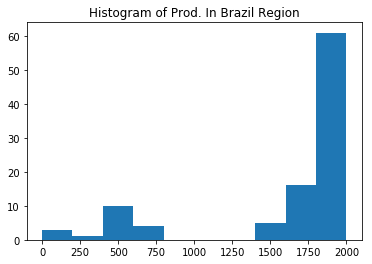

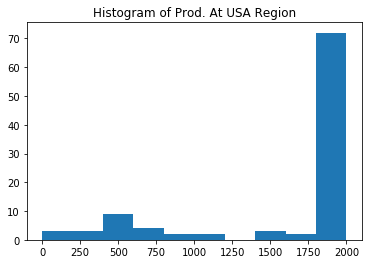

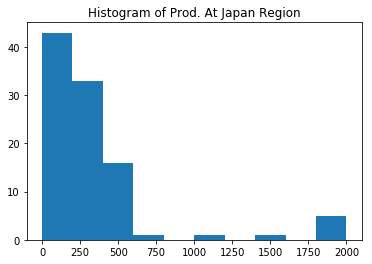

In [48]:
def run_pulp_model(df_Fixedcost, df_Varialbecost, df_Demand, df_Capacity):
    model = LpProblem("Capacitated Plant Location Model", LpMinimize)
    
    loc = ['USA', 'Germany', 'Japan', 'Brazil', 'India']
    size = ['Low_Cap','High_Cap']
    
    x = LpVariable.dicts("production_", [(i,j) for i in loc for j in loc], lowBound=0, upBound=None, cat='Continuous')
    y = LpVariable.dicts("plant_", [(i,s) for s in size for i in loc], cat='Binary')
    
    model += (lpSum([df_Fixedcost.loc[i,s] * y[(i,s)] for s in size for i in loc]) + lpSum([(df_Distance.loc[i,j] + random.normalvariate(0, 5))*x[(i,j)] for i in loc for j in loc]))
    
    for j in loc:
        rd = random.normalvariate(0, df_Demand.loc[j,'Demand'] * 0.05)
        model += lpSum([x[(i, j)] for i in loc]) == (df_Demand.loc[j,'Demand'] + rd)
    
    for i in loc:
        model += lpSum([x[(i, j)] for j in loc]) <= lpSum([df_Capacity.loc[i,s] * y[(i,s)] for s in size])  
    
    
    model += y[('USA','High_Cap')] - y[('Germany','Low_Cap')] <= 0   
    
    model.solve() 
    
    o ={}
    for i in loc:
        o[i] =value(lpSum ( [ x[i, j] for j in loc ]  ))
    
    o['Obj'] = value(model.objective) 
        
    return o 


# Call the function 100 times and append results to list
output = []
for i in range(100):
    output.append(run_pulp_model(df_Fixedcost, df_Variablecost, df_Demand, df_Capacity))
df = pd.DataFrame(output)


#print (df)
# Import matplotlib
import matplotlib.pyplot as plt

# Plot histogram of Brazil Production
plt.hist(df['Brazil'])
plt.title('Histogram of Prod. In Brazil Region')
plt.show()

#import matplotlib.pyplot as plt
plt.title('Histogram of Prod. At USA Region')

# Histogram of USA production
plt.hist(df['USA'])
plt.show()
plt.title('Histogram of Prod. At Japan Region')

# Histogram of Japan production
plt.hist(df['Japan'])
plt.show()


In [34]:
#PreventatiAdd noise to the regional demand estimates. Set the parameters of the random.normalvariate() method where the mean=0 and the standard deviation is 5% of the demand estimate.ve maintenance scheduling
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value
#At a quarry they use diamond saws to cut slabs of marble.
#For preventative maintenance the saws are only allowed to run for 4 consecutive hours, 
#afterwards a 1 hour inspection is completed before they are allowed to go back into service. 
#The quarry operates 10-hour shifts. 
#At the end of the shift if the saw blades have not been used for 4 consecutive hours,
#the remaining time will be used at the start of the next shift.
#The expected number of saw blades needed for each hour is listed below. 
#Our goal is to determine the minimum number of saw blades are needed for the shift.

#Hour	Saws Needed
#0	7
#1	7
#2	7
#3	6
#4	5
#5	6
#6	6
#7	7
#8	7
#9	6

# The class has been initialize, and hours defined
model = LpProblem("Minimize Staffing", LpMinimize)
hours = list(range(10))

# Define Decision Variables
x = LpVariable.dicts('saws_', hours, lowBound=0, cat='Integer')
# Define Objective
model += lpSum([x[i] for i in hours])

# Define Constraints
model += x[0] + x[2] + x[3] + x[4] + x[5] + x[7] + x[8] + x[9] >= 7
model += x[1] + x[3] + x[4] + x[5] + x[6] + x[8] + x[9] + x[0] >= 7
model += x[2] + x[4] + x[5] + x[6] + x[7] + x[9] + x[0] + x[1] >= 7
model += x[3] + x[5] + x[6] + x[7] + x[8] + x[0] + x[1] + x[2] >= 6
model += x[4] + x[6] + x[7] + x[8] + x[9] + x[1] + x[2] + x[3] >= 5
model += x[5] + x[7] + x[8] + x[9] + x[0] + x[2] + x[3] + x[4] >= 6
model += x[6] + x[8] + x[9] + x[0] + x[1] + x[3] + x[4] + x[5] >= 6
model += x[7] + x[9] + x[0] + x[1] + x[2] + x[4] + x[5] + x[6] >= 7
model += x[8] + x[0] + x[1] + x[2] + x[3] + x[5] + x[6] + x[7] >= 7
model += x[9] + x[1] + x[2] + x[3] + x[4] + x[6] + x[7] + x[8] >= 6

model.solve()

#Distribution of employee 
for v in model.variables():
    print(v.name, '=', v.varValue)
    
#Total numbe of empolyee    
obj = value(model.objective)
print (obj)

saws__0 = 3.0
saws__1 = 0.0
saws__2 = 2.0
saws__3 = 2.0
saws__4 = 2.0
saws__5 = 0.0
saws__6 = 0.0
saws__7 = 0.0
saws__8 = 0.0
saws__9 = 0.0
9.0


In [33]:
#Scheduling workers problem
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value


#Day of Week	Employees Needed
#0 = Monday	31
#1 = Tuesday	45
#2 = Wednesday	40
#3 = Thursday	40
#4 = Friday	48
#5 = Saturday	30
#6 = Sunday	25

# The class has been initialize, and x, and days defined
model = LpProblem("Minimize Staffing", LpMinimize)
days = list(range(7))
x = LpVariable.dicts('staff_', days, lowBound=0, cat='Integer')

# Define Objective
model += lpSum([x[i] for i in days])

# Define Constraints
model += x[0] + x[3] + x[4] + x[5] + x[6] >= 31
model += x[1] + x[4] + x[5] + x[6] + x[0] >= 45
model += x[2] + x[5] + x[6] + x[0] + x[1] >= 40
model += x[3] + x[6] + x[0] + x[1] + x[2] >= 40
model += x[4] + x[0] + x[1] + x[2] + x[3] >= 48
model += x[5] + x[1] + x[2] + x[3] + x[4] >= 30
model += x[6] + x[2] + x[3] + x[4] + x[5] >= 25

model.solve()

#print("Status:", LpStatus[P.status])

#Distribution of employee 
for v in model.variables():
    print(v.name, '=', v.varValue)
    
#Total numbe of empolyee    
obj = value(model.objective)
print (obj)

staff__0 = 14.0
staff__1 = 14.0
staff__2 = 8.0
staff__3 = 0.0
staff__4 = 13.0
staff__5 = 0.0
staff__6 = 4.0
53.0


In [ ]:
#Traveling salesman problem (TSP)
#15 cities, distances between cities come out in DataFrame(15*15)


# Define Decision Variables
x = LpVariable.dicts('X', [(c1, c2) for c1 in cities for c2 in cities], cat='Binary')
u = LpVariable.dicts('U', [c1 for c1 in cities], lowBound=0, upBound=(n-1), cat='Integer')

#Use LpVariable.dicts to create a dictionary x holding binary variables for each city to city pair, 
#and to create a dictionary u holding an integer LpVariable for each city


# Define Objective
model += lpSum([dist.iloc[c1, c2] * x[(c1, c2)] for c1 in cities for c2 in cities])

# Define Constraints
for c2 in cities:
    model += lpSum([x[(c1, c2)] for c1 in cities]) == 1
for c1 in cities:
    model += lpSum([x[(c1, c2)] for c2 in cities]) == 1

#Use the x binary variable to define a set of constraints to requires that each city be arrived at from exactly one other city,
#and a second set of constraints that requires that from each city there is a departure to exactly one other city.

#In the first set of constraints if we loop through the list of destination cities we should sum over the departure cities and ensure they sum to 1.
#In the second set of constraints if we loop through the list of arrival cities we should sum over the departure cities and ensure they sum to 1.

In [1]:
#Customer	New York	Atlanta
#East	$211	$232
#South	$232	$212
#Midwest	$240	$230
#West	$300	$280


In [2]:
# Define decision variables
key = [(m, w, c) for m in months for w in warehouse for c in customers]
var_dict = LpVariable.dicts('num_of_shipments', key, lowBound=0, cat='Integer')

# Use the LpVariable dictionary variable to define objective
model += lpSum([costs[(w, c)] * var_dict[(m, w, c)] 
                for m in months for w in warehouse for c in customers])

NameError: name 'months' is not defined

In [7]:
months =[1,2,3,4,5]
warehouse = ['North', 'West']
customers = ['Chelsea', 'Wimbledon']

key = [(m, w, c) for m in months for w in warehouse for c in customers]
print(len(key))

20
